In [2]:
import lib_analysis
import gin
import lib_biased_mnist
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [3]:
gin.enter_interactive_mode()

/home/ericpts/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


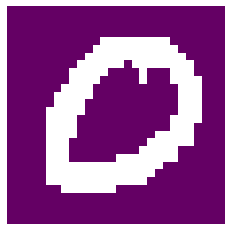

In [40]:
import os
os.environ['SCRATCH'] = '/tmp/'

gin.bind_parameter('BiasedMnistScenario.filter_for_digits', list(range(10)))
gin.bind_parameter('BiasedMnistScenario.training_data_label_correlation', 0.9)
gin.bind_parameter('BiasedMnistScenario.background_noise_level', 0)

D_train = lib_biased_mnist.BiasedMnistScenario().generate_ood_testing_data()
X, y = next(D_train.batch(10_000).as_numpy_iterator())


plt.axis('off')
plt.imshow(X[202])
plt.savefig('3.png')

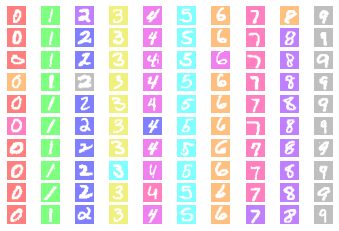

In [4]:
D_test = lib_biased_mnist.BiasedMnistScenario().generate_id_testing_data()
X, y = next(D_test.batch(10_000).as_numpy_iterator())
lib_analysis.plot_digit_grid(X, y)

plt.savefig('biased_mnist_test_id.png')

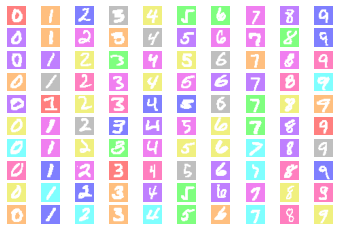

In [5]:
D_test = lib_biased_mnist.BiasedMnistScenario().generate_ood_testing_data()
X, y = next(D_test.batch(10_000).as_numpy_iterator())
lib_analysis.plot_digit_grid(X, y)

plt.savefig('biased_mnist_test_ood.png')